In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.sample()

,age,sex,bmi,children,smoker,region,charges
605,51,female,34.1,0,no,southeast,9283.562


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From the above preprocessing methods we can see that there are no null values in this dataset which is great. 

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#Here we can see have a look at the summary statistics for the numerical column and for age, bmi and children the mean and median are quite equal which shows a normal distribution however, for charges mean is higher than median which indicates that the data is skewed to the right. Moreover, we can see that there outliers in this dataset and especially quite high for charges since the difference between the 75th quantile and max is quite huge. There are outliers for age, bmi and children but given the nature of this dataset, I will keep it for now. My target variable here is charges so I will have to correct the skewness and outliers in the next steps 

In [11]:
df.charges.unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [12]:
check_uniquevalues = df.nunique()
print(check_uniquevalues)

1337

From this table we can see that our target variable 'charges' is a continous variable and has a very high number of unique values and given the size of the dataset we can say that this is a regression problem.

In [13]:
df['smoker'] = df['smoker'].astype('category')
df['sex'] = df['sex'].astype('category')
df['region'] = df['region'].astype('category')

In [14]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [15]:
#We have successfully converted object variables into category this will help with further data analysis.

<Axes: xlabel='age', ylabel='Density'>

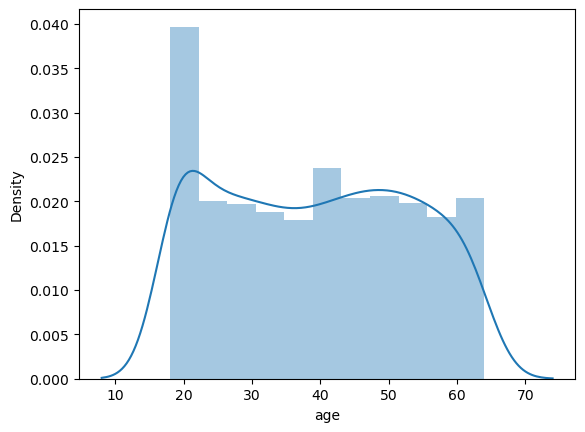

In [16]:
sns.distplot(df['age'])

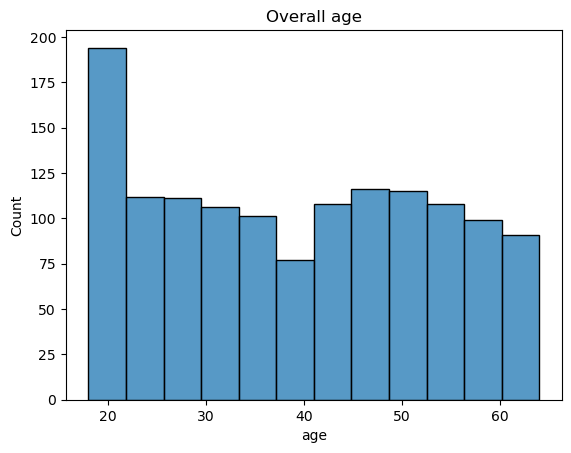

In [17]:
sns.histplot(x='age', data=df)
plt.xlabel('age')
plt.ylabel('Count')
plt.title('Overall age')
plt.show()

For age, we can see a bimodal distribution which means that there are two groups which are more prevalent. This shows that data is not normally distributed which is something we would expect since it is reflecting different types of age groups and it is a crucial component for this dataset and especially to evaluate the relationship between age and insurance charges.

<Axes: xlabel='bmi', ylabel='Density'>

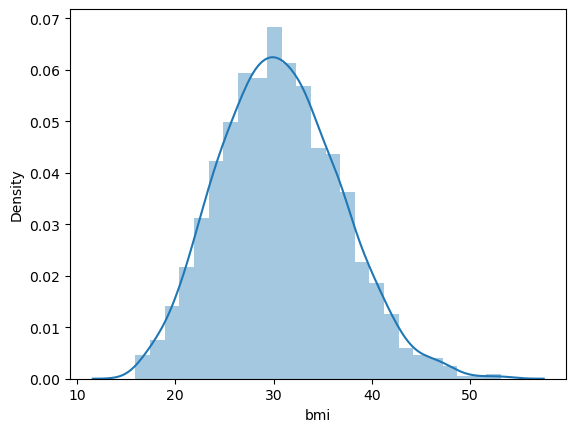

In [18]:
sns.distplot(df['bmi'])

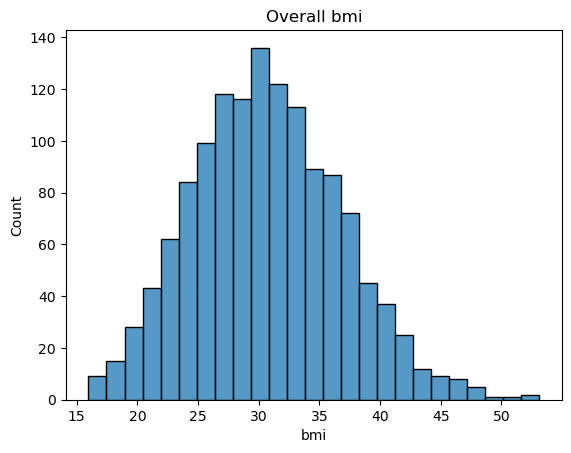

In [19]:
sns.histplot(x='bmi', data=df)
plt.xlabel('bmi')
plt.ylabel('Count')
plt.title('Overall bmi')
plt.show()

Here, we can see normal distribution wherein the data falls within the range of 20 t0 45. The average bmi is 30.

<Axes: xlabel='children', ylabel='Density'>

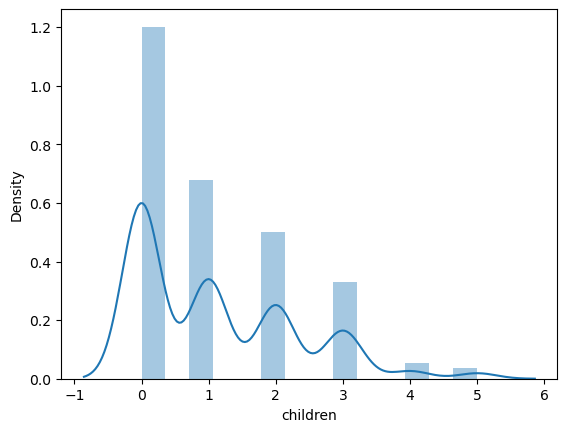

In [20]:
sns.distplot(df['children'])

These graph shows multiple peaks (multimodal) which states that there might be ouliers or unusual values however given the nature of this dataset, I will further investigate this.

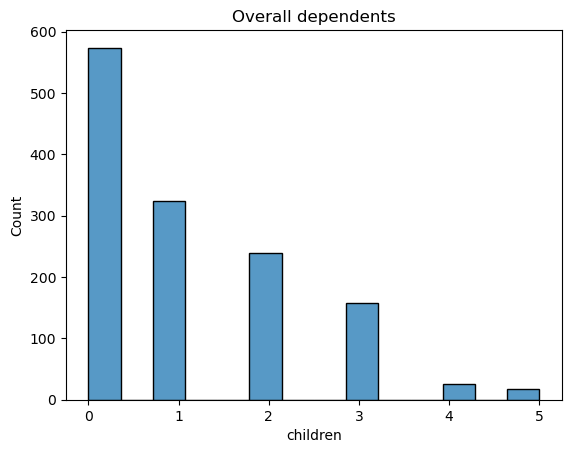

In [21]:
sns.histplot(x='children', data=df)
plt.xlabel('children')
plt.ylabel('Count')
plt.title('Overall dependents')
plt.show()

In this dataset, we can see that there are high number of people with 0 zero children followed by 1 and 2

<Axes: xlabel='charges', ylabel='Density'>

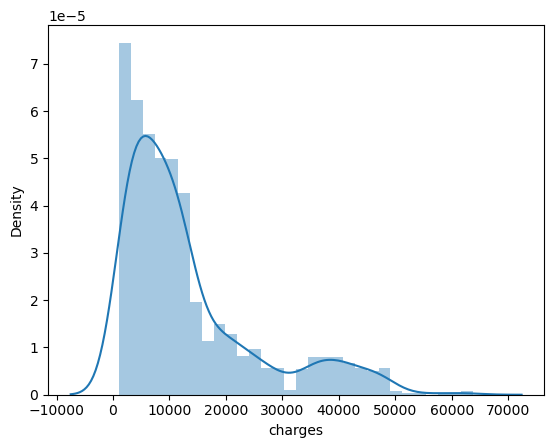

In [22]:
sns.distplot(df['charges'])

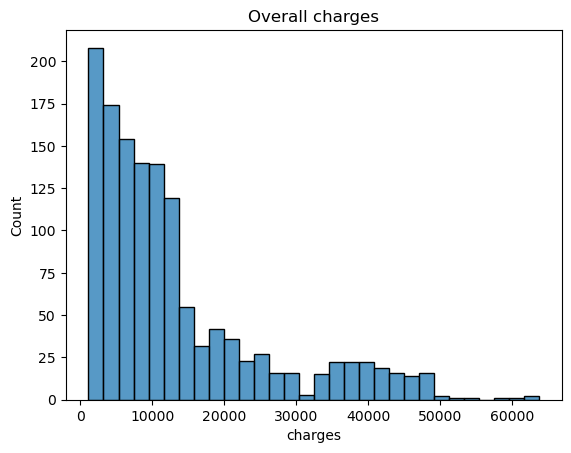

In [23]:
x = sns.histplot(x='charges', data=df)
plt.xlabel('charges')
plt.ylabel('Count')
plt.title('Overall charges')
plt.show()

This graph shows that majority of the data points reflects to lower charges compared to high charges. This means that majority of the people are paying low medical expenses. However, it also shows that there might be either presence of outliers or very high medical charges for some people. I will be transforming this variable since skewness and outliers will need to be dealt with.

sex
male      676
female    662
Name: count, dtype: int64


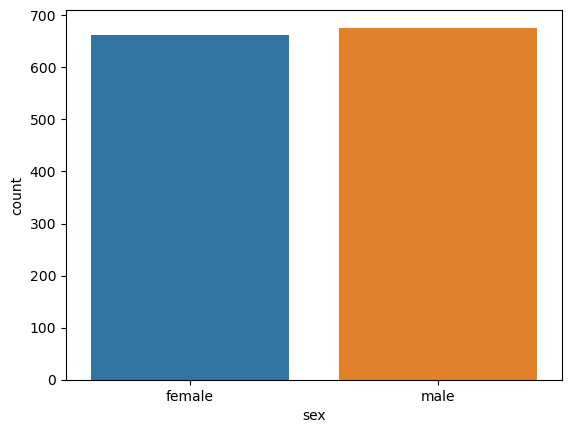

In [24]:
print(df['sex'].value_counts())
sex=sns.countplot(x='sex', data=df)
plt.show()

We can see that there are higher number of male compared to female. The sample size is very good since there is not a huge difference between the two gender's participation.

region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64


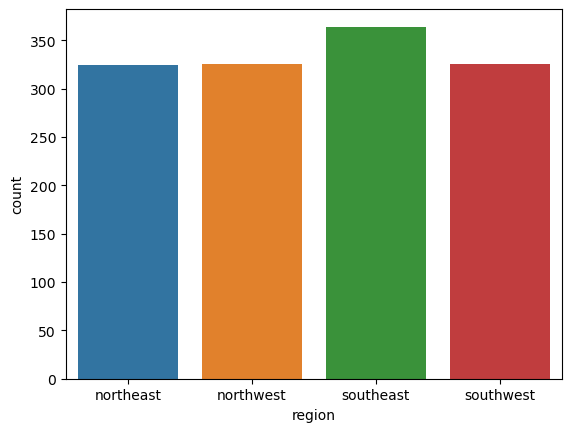

In [25]:
print(df['region'].value_counts())
region=sns.countplot(x='region', data=df)
plt.show()

we can see that majority of the people are from southeast

smoker
no     1064
yes     274
Name: count, dtype: int64


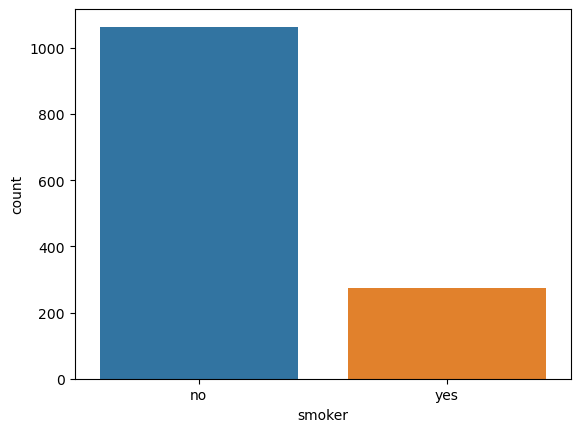

In [26]:
print(df['smoker'].value_counts())
smoking=sns.countplot(x='smoker', data=df)
plt.show()

There are less smokers compared to non-smoker

Now we can look at bivariate analysis to see how these variables affect my target variable

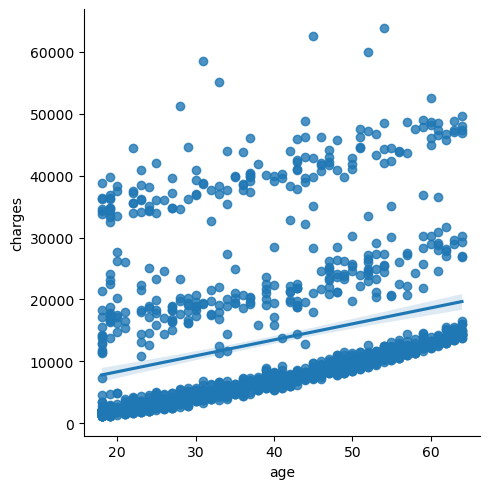

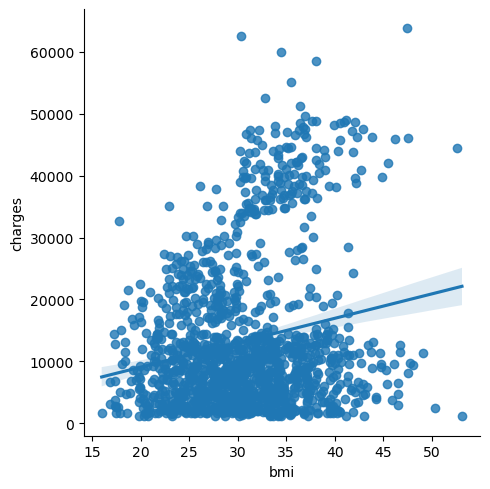

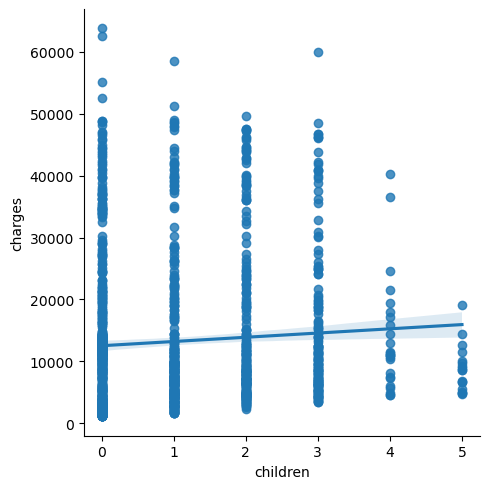

In [27]:
sns.lmplot(x='age', y='charges', data=df)
sns.lmplot(x='bmi', y='charges', data=df)
sns.lmplot(x='children', y='charges', data=df)

Here we can see that there is strong positive relationship between age and charges, children and charges as well as bmi & charges which shows that the higher the rate of these variables, the higher the charges.

<Axes: xlabel='sex', ylabel='charges'>

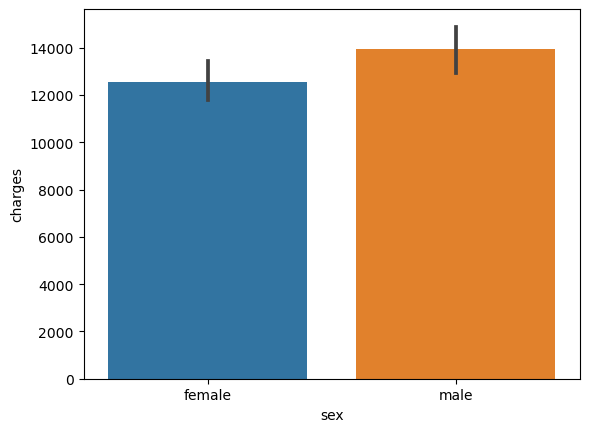

In [28]:
sns.barplot(x='sex', y='charges', data=df)

<Axes: xlabel='smoker', ylabel='charges'>

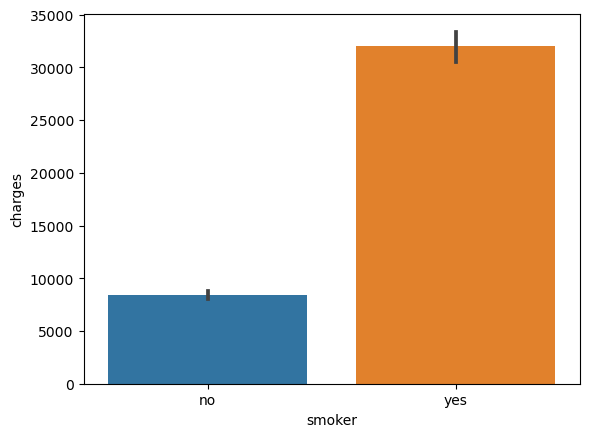

In [29]:
sns.barplot(x='smoker', y='charges', data=df)

<Axes: xlabel='region', ylabel='charges'>

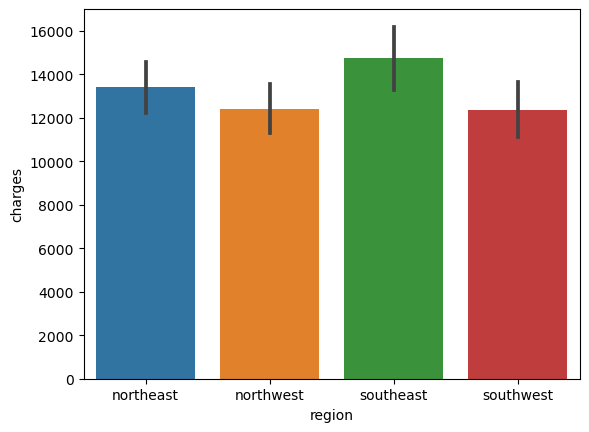

In [30]:
sns.barplot(x='region', y='charges', data=df)

These are the value counts of the categorical variables where we can see that charges are tend to be higher for southeast region, if a person is a smoker and quite similar for whether its a male or female

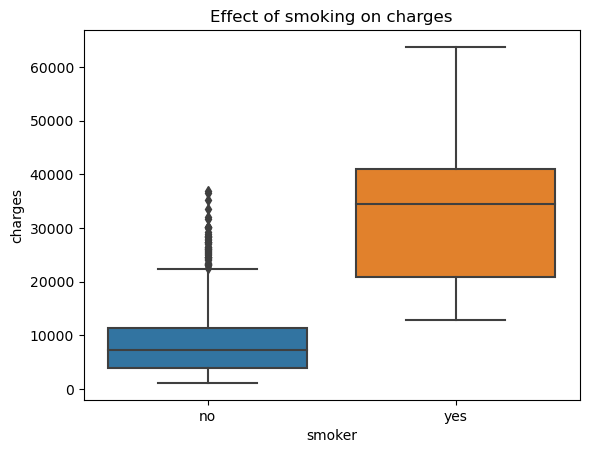

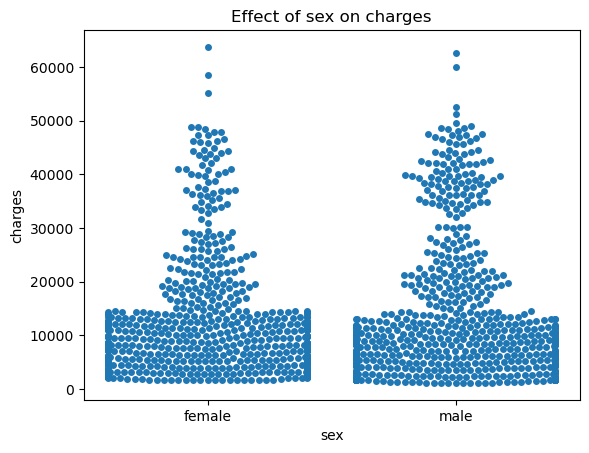

In [31]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Effect of smoking on charges')
plt.show()

sns.swarmplot(x='sex', y='charges', data=df)
plt.title('Effect of sex on charges')
plt.show()

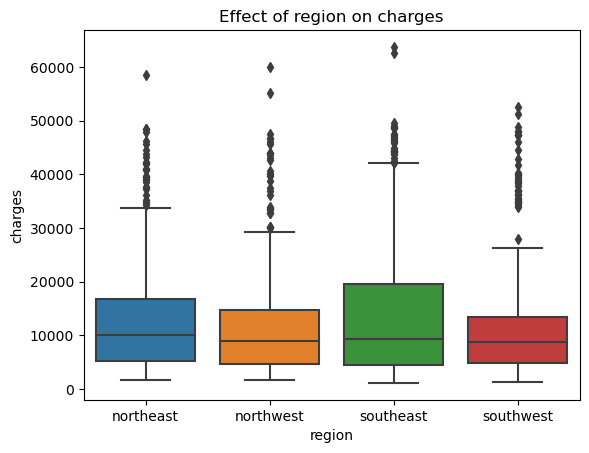

In [32]:
sns.boxplot(x='region', y='charges', data=df)
plt.title('Effect of region on charges')
plt.show()

We can see that the box plot shows us that these categorical variable has outliers however it is worth noticing that outliers tend to be incorrect data or invalid values but given the nature of this dataset, it will be quite odd to remove the outliers as all these variables are quite prominent for this dataset

In [33]:
from scipy import stats
male = df[df['sex'] == 'male']['charges']
female = df[df['sex'] == 'female']['charges']

t_stat, p_value = stats.ttest_ind(male, female)

print(f'T-stats: {t_stat}')
print(f'p-value: {p_value}')

if p_value < 0.05:
    print('Found statistical difference between in charges between male and female')
else:
    print('Found no statistical difference between in charges between male and female.')

T-stats: 2.097546590051688
p-value: 0.03613272100592976
Found statistical difference between in charges between male and female


This suggest that medical insurance charges are quite high when its a person is male compared to female.

In [34]:
smoker = df[df['smoker'] == 'yes']['charges']
non_smoker = df[df['smoker'] == 'no']['charges']

t_stat, p_value = stats.ttest_ind(smoker, non_smoker)

print(f'T-stats: {t_stat}')
print(f'p-value: {p_value}')

if p_value < 0.05:
    print('Found statistical difference between in charges between smoker and non-smoker')
else:
    print('Found no statistical difference between in charges between smoker and non-smoker.')

T-stats: 46.66492117272371
p-value: 8.271435842179102e-283
Found statistical difference between in charges between smoker and non-smoker


Here the results are showing that the mean for smoker is quite high than non-smoker which suggests that smoking does influence the medical insurance charges which does support the previous graphical analysis.

In [35]:
f_value, p_value = stats.f_oneway(df[df['region']=='southeast']['charges'],
                                  df[df['region'] == 'southwest']['charges'], 
                                  df[df['region'] == 'northeast']['charges'], 
                                  df[df['region'] == 'northwest']['charges'])

print(f'Stats value: {f_value}')
print(f'p value: {p_value}')

Stats value: 2.9696266935891193
p value: 0.0308933560705201


Here we can see that the p value is less than 0.05 which means that the means of these regions are not equal. we are rejecting the null hyptohesis here. Moreover, the stats value is higher as well which shows that the variance level in between the regional group are different. However, anova does not necessarily point out which regions are different from each other and to check that I will be running pairise tukey's test.

In [36]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

testing_tukey = pairwise_tukeyhsd(endog=df['charges'],     
                          groups=df['region'],     
                          alpha=0.05)              

print(testing_tukey.summary())


       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest  -988.8091 0.7245 -3428.9343 1451.3161  False
northeast southeast  1329.0269 0.4745 -1044.9417 3702.9955  False
northeast southwest -1059.4471 0.6792 -3499.5723 1380.6781  False
northwest southeast  2317.8361 0.0583   -54.1994 4689.8716  False
northwest southwest    -70.638 0.9999 -2508.8826 2367.6066  False
southeast southwest -2388.4741 0.0477 -4760.5096  -16.4386   True
-----------------------------------------------------------------


This table clearly confirms the earlier graph showing the differences between southeast and southwest. We saw earlier that charges are quite higher for southeast region compared to other regions.

In [37]:
Cat_col = []
Num_col = []

for col, col_type in df.dtypes.items():
    if col_type == 'category':
        Cat_col.append(col)
    else:
        Num_col.append(col)
print(f"Categorical Data: {Cat_col}")
print(f"Numerical Data: {Num_col}")

Categorical Data: ['sex', 'smoker', 'region']
Numerical Data: ['age', 'bmi', 'children', 'charges']


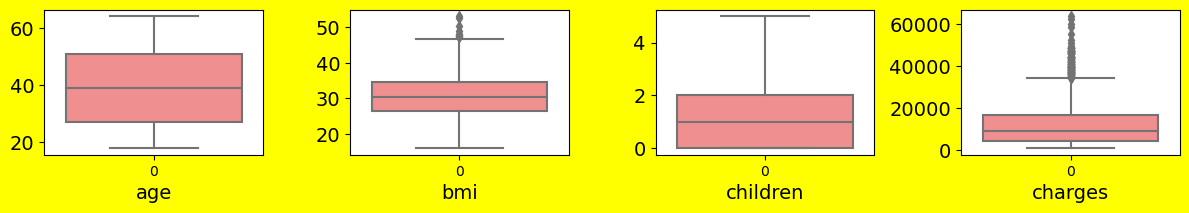

In [38]:
plt.figure(figsize= (12, 8), facecolor= "yellow")
PN = 1
for col in Num_col:
        if PN<=4:
            plots=plt.subplot(4, 4, PN)
            sns.boxplot(df[col], palette='spring_r')
            plt.xlabel(col,fontsize = 14)
            plt.yticks(rotation = 0, fontsize = 14)
        PN+=1
plt.tight_layout()

In [ ]:
#here we can see that outliers tends to be quite high for bmi and charges. since charges is our target variable and it includes both skewness and outliers, we will remove it. 

In [ ]:
mean_bmi = df['bmi'].mean()
std_bmi = df['bmi'].std()

bmi_zscores = (df['bmi'] - mean_bmi) / std_bmi
bmi_zscores

In [ ]:
outliers = bmi_zscores[(bmi_zscores > 3) | (bmi_zscores < -3)]
print(outliers)

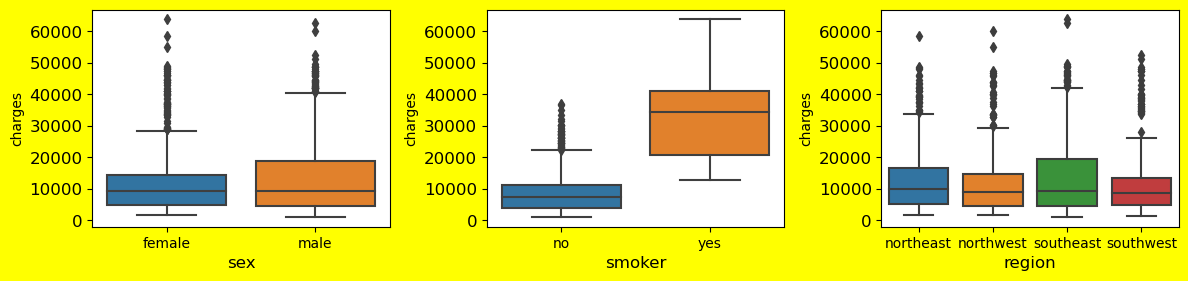

In [39]:
plt.figure(figsize= (12, 8), facecolor= "yellow")
PN = 1
for col in Cat_col:
        if PN<=4:
            plots=plt.subplot(3, 3, PN)
            sns.boxplot(x=col, y='charges', data=df)
            plt.xlabel(col,fontsize = 12)
            plt.yticks(rotation = 0, fontsize = 12)
        PN+=1
plt.tight_layout()

In [40]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [41]:
df['charges']=np.cbrt(df['charges'])

<Axes: xlabel='charges', ylabel='Density'>

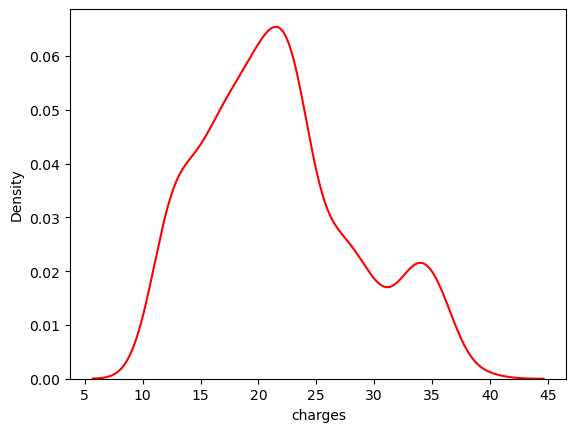

In [42]:
sns.distplot(df['charges'], color = 'r', hist=False )

In [160]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

df_new = df[(df['charges'] >= lower) & (df['charges'] <= upper)]


In [162]:
mean_charges = df['charges'].mean()
std_charges = df['charges'].std()

charges_zscores = (df['charges'] - mean_charges) / std_charges
charges_zscores

0       0.592274
1      -1.474650
2      -0.800833
3       0.949231
4      -0.914572
          ...   
1333    0.034340
1334   -1.319807
1335   -1.508847
1336   -1.380605
1337    1.366722
Name: charges, Length: 1338, dtype: float64

In [163]:
outliers2 = charges_zscores[(bmi_zscores > 3) | (charges_zscores < -3)]
print(outliers2)

116     0.114020
847    -1.253025
1047    2.072435
1317   -1.698088
Name: charges, dtype: float64


In [44]:
df_new

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,25.654666
1,18,male,33.770,1,no,southeast,11.994331
2,28,male,33.000,3,no,southeast,16.447599
3,33,male,22.705,0,no,northwest,28.013799
4,32,male,28.880,0,no,northwest,15.695891
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,21.967271
1334,18,female,31.920,0,no,northeast,13.017690
1335,18,female,36.850,0,no,southeast,11.768318
1336,21,female,25.800,0,no,southwest,12.615872


In [ ]:
df_new

In [45]:
import scipy.stats as stats

contingency_table = pd.crosstab(df['smoker'], df['region'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("frequency test results:\n", expected)
freq_more_than_five = (expected >= 5).all()
print("final frequencies are equal to more than 5:", freq_more_than_five)


frequency test results:
 [[257.65022422 258.44544096 289.45889387 258.44544096]
 [ 66.34977578  66.55455904  74.54110613  66.55455904]]
final frequencies are equal to more than 5: True


In [46]:
import scipy.stats as stats

contingency_table = pd.crosstab(df['sex'], df['smoker'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("frequency test results:\n", expected)
freq_more_than_five = (expected >= 5).all()
print("final frequencies are equal to more than 5:", freq_more_than_five)

frequency test results:
 [[526.43348281 135.56651719]
 [537.56651719 138.43348281]]
final frequencies are equal to more than 5: True


In [47]:
import scipy.stats as stats

contingency_table = pd.crosstab(df['sex'], df['region'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("frequency test results:\n", expected)
freq_more_than_five = (expected >= 5).all()
print("final frequencies are equal to more than 5:", freq_more_than_five)

frequency test results:
 [[160.30493274 160.79970105 180.09566517 160.79970105]
 [163.69506726 164.20029895 183.90433483 164.20029895]]
final frequencies are equal to more than 5: True


In [48]:
cont_tab = pd.crosstab(df['sex'], df['smoker'])

chi2, p, dof, expected = stats.chi2_contingency(cont_tab)

print("Chi-Square results:", chi2)
print("Overall P-value:", p)
print("Total Degrees of freedom:", dof)


Chi-Square results: 7.39291081459996
Overall P-value: 0.006548143503580696
Total Degrees of freedom: 1


Here we can see that the p-value is very low which suggests a statistical association these two variables. This means the distribution differs for smoking between the two sexes. 

In [49]:
cont_tab = pd.crosstab(df['sex'], df['region'])

chi2, p, dof, expected = stats.chi2_contingency(cont_tab)

print("Chi-Square results:", chi2)
print("Overall P-value:", p)
print("Total Degrees of freedom:", dof)

Chi-Square results: 0.43513679354327284
Overall P-value: 0.9328921288772233
Total Degrees of freedom: 3


Here the p-value is higher than 0.05 and chi-sqaure is very low which suggests that there is no statistical association between these two variables

In [50]:
cont_tab = pd.crosstab(df['region'], df['smoker'])

chi2, p, dof, expected = stats.chi2_contingency(cont_tab)

print("Chi-Square results:", chi2)
print("Overall P-value:", p)
print("Total Degrees of freedom:", dof)

Chi-Square results: 7.343477761407071
Overall P-value: 0.06171954839170541
Total Degrees of freedom: 3


The p-value is higher than 0.05 suggesting no statistical association between smoking and region

In [59]:
from sklearn.preprocessing import OrdinalEncoder
ORD = OrdinalEncoder()
for i in df_new.columns:
    if df_new[i].dtypes=='category':
        df_new[i]= ORD.fit_transform(df_new[i].values.reshape(-1,1))
df_new

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,25.654666
1,18,1.0,33.770,1,0.0,2.0,11.994331
2,28,1.0,33.000,3,0.0,2.0,16.447599
3,33,1.0,22.705,0,0.0,1.0,28.013799
4,32,1.0,28.880,0,0.0,1.0,15.695891
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,21.967271
1334,18,0.0,31.920,0,0.0,0.0,13.017690
1335,18,0.0,36.850,0,0.0,2.0,11.768318
1336,21,0.0,25.800,0,0.0,3.0,12.615872


In [60]:
dfcorrelation=df_new.corr()

In [61]:
dfcorrelation

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.021532,0.107705,0.042459,-0.027854,0.001369,0.452970
sex,-0.021532,1.000000,0.049187,0.015969,0.076809,0.003914,0.027980
bmi,0.107705,0.049187,1.000000,0.013994,-0.002989,0.158862,0.149330
children,0.042459,0.015969,0.013994,1.000000,0.008199,0.017680,0.126256
smoker,-0.027854,0.076809,-0.002989,0.008199,1.000000,-0.000764,0.728833
region,0.001369,0.003914,0.158862,0.017680,-0.000764,1.000000,-0.028354
charges,0.452970,0.027980,0.149330,0.126256,0.728833,-0.028354,1.000000


<Axes: >

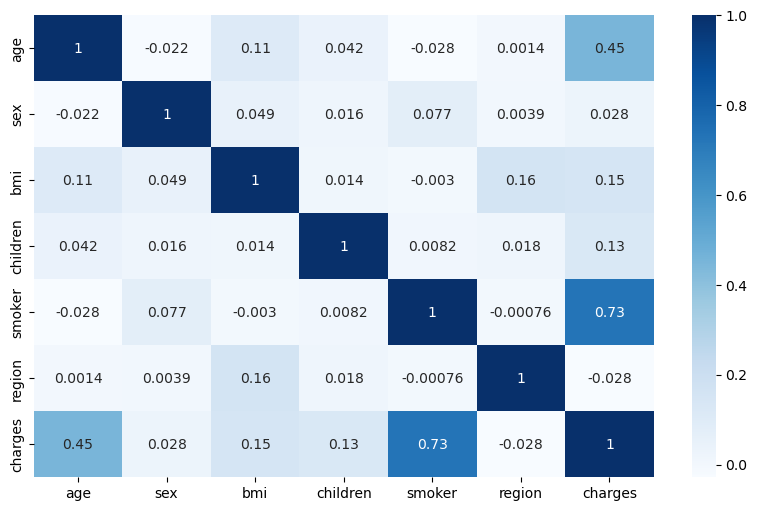

In [62]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcorrelation, cmap='Blues', annot=True)

In [63]:
#We can see that there is a high correlation between age and charges, smoking and charges

In [64]:
dfcorrelation['charges'].sort_values(ascending = False)

charges     1.000000
smoker      0.728833
age         0.452970
bmi         0.149330
children    0.126256
sex         0.027980
region     -0.028354
Name: charges, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

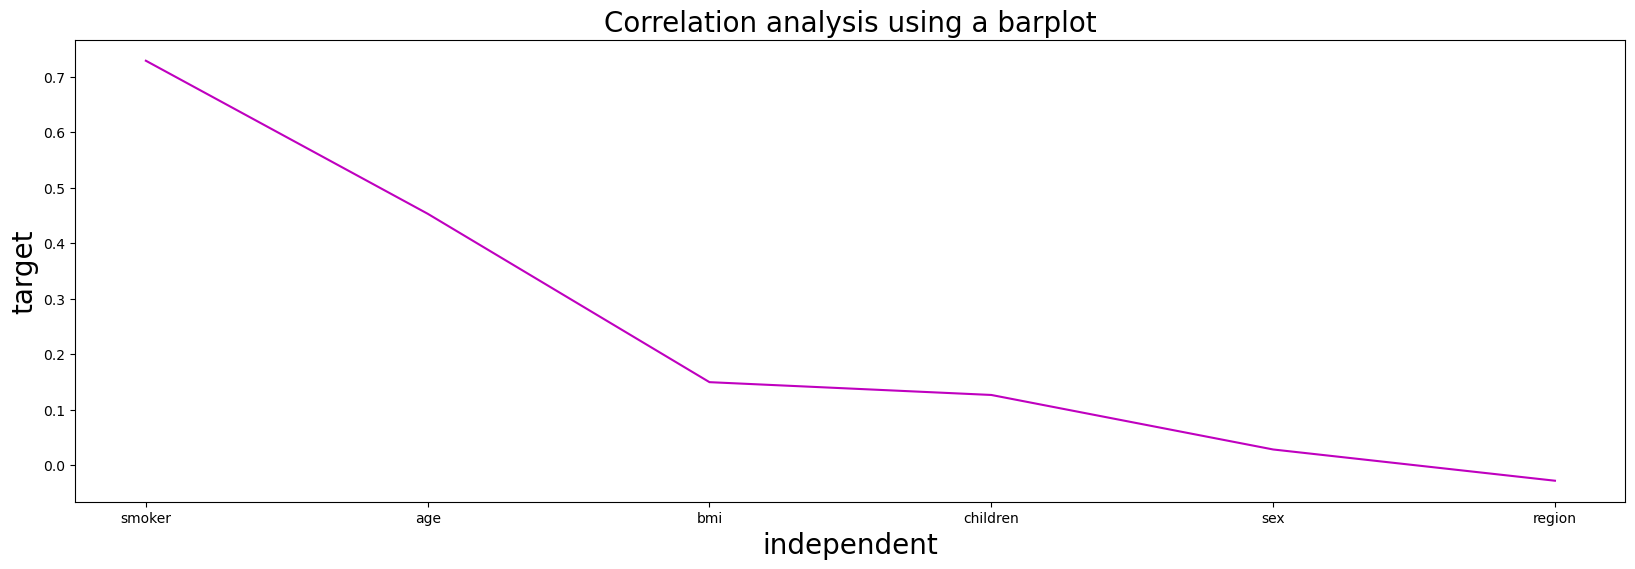

In [65]:
plt.figure(figsize = (20,6))
df_new.corr()['charges'].sort_values(ascending = False).drop(['charges']).plot(kind='line',color='m')
plt.xlabel('independent', fontsize = 20)
plt.ylabel('target', fontsize = 20)
plt.title("Correlation analysis using a barplot", fontsize=20)
plt.show

In [66]:
df_new.describe()

,age,sex,bmi,children,smoker,region,charges
count,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000
mean,39.188156,0.505247,30.642635,1.095202,0.202399,1.516492,21.687329
std,14.058120,0.500160,6.085737,1.205423,0.401939,1.105513,6.547499
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,10.390777
25%,26.250000,0.000000,26.237500,0.000000,0.000000,1.000000,16.779582
50%,39.000000,1.000000,30.352500,1.000000,0.000000,2.000000,21.054271
75%,51.000000,1.000000,34.656250,2.000000,0.000000,2.000000,25.434797
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,38.060707


In [68]:
from sklearn.preprocessing import StandardScaler

scaling_data = ['children', 'age', 'bmi']

scale = StandardScaler()

df_new[scaling_data] = scale.fit_transform(df_new[scaling_data])



In [69]:
df_new

,age,sex,bmi,children,smoker,region,charges
0,-1.436588,0.0,-0.450835,-0.908903,1.0,3.0,25.654666
1,-1.507748,1.0,0.514077,-0.079008,0.0,2.0,11.994331
2,-0.796149,1.0,0.387504,1.580782,0.0,2.0,16.447599
3,-0.440349,1.0,-1.304790,-0.908903,0.0,1.0,28.013799
4,-0.511509,1.0,-0.289742,-0.908903,0.0,1.0,15.695891
...,...,...,...,...,...,...,...
1333,0.769370,1.0,0.053812,1.580782,0.0,1.0,21.967271
1334,-1.507748,0.0,0.209974,-0.908903,0.0,0.0,13.017690
1335,-1.507748,0.0,1.020368,-0.908903,0.0,2.0,11.768318
1336,-1.294268,0.0,-0.796034,-0.908903,0.0,3.0,12.615872


In [71]:
df_new.describe()

,age,sex,bmi,children,smoker,region,charges
count,1334.000000,1334.000000,1.334000e+03,1.334000e+03,1334.000000,1334.000000,1334.000000
mean,0.000000,0.505247,8.895100e-16,5.193247e-17,0.202399,1.516492,21.687329
std,1.000375,0.500160,1.000375e+00,1.000375e+00,0.401939,1.105513,6.547499
min,-1.507748,0.000000,-2.413535e+00,-9.089033e-01,0.000000,0.000000,10.390777
25%,-0.920678,0.000000,-7.241172e-01,-9.089033e-01,0.000000,1.000000,16.779582
50%,-0.013389,1.000000,-4.769245e-02,-7.900802e-02,0.000000,2.000000,21.054271
75%,0.840530,1.000000,6.597591e-01,7.508872e-01,0.000000,2.000000,25.434797
max,1.765609,1.000000,3.696479e+00,3.240573e+00,1.000000,3.000000,38.060707


In [72]:
independent =df_new.drop("charges", axis = 1)
dependent = df_new["charges"]

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(independent.values, r) for r in range(len(independent.columns))]
vif["Independent Variables"] = independent.columns

vif

,VIF values,Independent Variables
0,1.014250,age
1,1.565442,sex
2,1.022438,bmi
3,1.002057,children
4,1.206316,smoker
5,1.572729,region


In [74]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor 

Note, i want to create a list to run the all the models together but its very time consuming and hence i had to do it individually

In [113]:
Highest_Accuracy = 0
True_random_state = 0
for r in range(1,300):
    independent_train,independent_test,dependent_train,dependent_test = train_test_split(independent, dependent, test_size = 0.30, random_state=r)
    LinearR = LinearRegression()
    LinearR.fit(independent_train, dependent_train)
    predictor=LinearR.predict(independent_test)
    initialscore = r2_score(dependent_test, predictor)
    if initialscore > Highest_Accuracy:
        Highest_Accuracy = initialscore
        True_random_state = r

print(f"True r2 Score: {Highest_Accuracy} at randomstate: {True_random_state}")

True r2 Score: 0.8238585722515108 at randomstate: 171


In [114]:
independent_train,independent_test,dependent_train,dependent_test = train_test_split(independent, dependent, test_size = 0.40, random_state=True_random_state)

In [115]:
LinearR = LinearRegression()
LinearR.fit(independent_train, dependent_train)
predict_LinearR=LinearR.predict(independent_test)
pred_train=LinearR.predict(independent_train)
print('r2_score:', r2_score (dependent_test, predict_LinearR))
print('r2_score on given training data:',r2_score(dependent_train, pred_train)*100)
print('MAE:', mean_absolute_error(dependent_test, predict_LinearR))
print('MSE:', mean_squared_error(dependent_test, predict_LinearR))
print('RSE:', np.sqrt(mean_squared_error(dependent_test, predict_LinearR)))

r2_score: 0.8097776089197599
r2_score on given training data: 75.3573321444082
MAE: 1.9549979151765424
MSE: 8.8011767782842
RSE: 2.9666777341471047


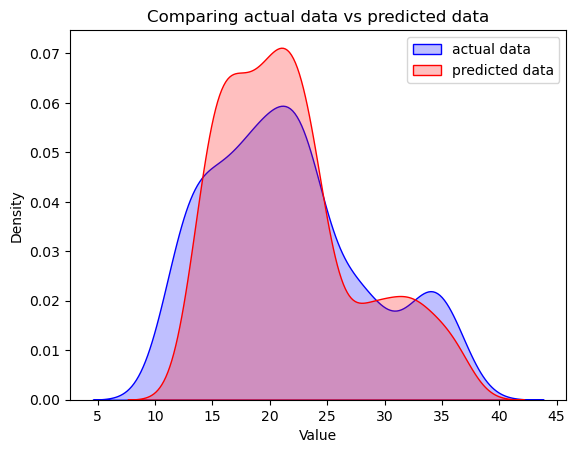

In [116]:
sns.kdeplot(dependent_test, color="blue", label="actual data", shade=True)
sns.kdeplot(predict_LinearR, color="red", label="predicted data", shade=True)
plt.title('Comparing actual data vs predicted data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [117]:
score = cross_val_score(LinearR,independent,dependent, scoring='r2')
print(score)
print(score.mean())
print("The overall difference is - ", (r2_score(dependent_test, predict_LinearR) - score.mean())*100)

[0.80677969 0.70686561 0.83160478 0.76917973 0.76261586]
0.7754091345299958
The overall difference is -  3.436847438976409


In [118]:
from sklearn.neighbors import KNeighborsRegressor as KNN

I wanted to define a function to get the scores using one code but it is taking too long to do so. 

In [119]:
KNNmodel = KNN(n_neighbors=5)
KNNmodel.fit(independent_train, dependent_train)
predict_KNNmodel=KNNmodel.predict(independent_test)
pred_train=KNNmodel.predict(independent_train)
print('r2_score:', r2_score (dependent_test, predict_KNNmodel))
print('r2_score on given training data:',r2_score(dependent_train, pred_train)*100)
print('MAE:', mean_absolute_error(dependent_test, predict_KNNmodel))
print('MSE:', mean_squared_error(dependent_test, predict_KNNmodel))
print('RSE:', np.sqrt(mean_squared_error(dependent_test, predict_KNNmodel)))

r2_score: 0.7007962521816067
r2_score on given training data: 75.73091143906154
MAE: 2.4818486352963354
MSE: 13.843507393217665
RSE: 3.720686414254454


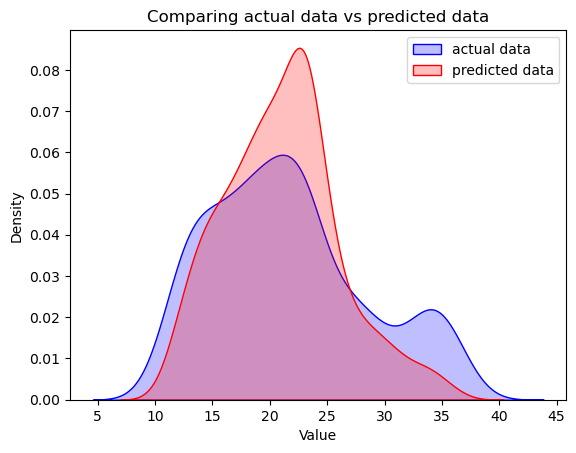

In [120]:
sns.kdeplot(dependent_test, color="blue", label="actual data", shade=True)
sns.kdeplot(predict_KNNmodel, color="red", label="predicted data", shade=True)
plt.title('Comparing actual data vs predicted data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [121]:
score = cross_val_score(KNNmodel,independent,dependent, scoring='r2')
print(score)
print(score.mean())
print("The overall difference is - ", (r2_score(dependent_test, predict_KNNmodel) - score.mean())*100)

[0.74095484 0.63590983 0.76876543 0.68678    0.71406816]
0.7092956515427604
The overall difference is -  -0.8499399361153737


In [122]:
from sklearn.tree import DecisionTreeRegressor

In [123]:
decisiontreeR = DecisionTreeRegressor(criterion = 'squared_error')
decisiontreeR.fit(independent_train, dependent_train)
predict_decisiontreeR=decisiontreeR.predict(independent_test)
pred_train=decisiontreeR.predict(independent_train)
print('r2_score:', r2_score (dependent_test, predict_decisiontreeR))
print('r2_score on given training data:',r2_score(dependent_train, pred_train)*100)
print('MAE:', mean_absolute_error(dependent_test, predict_decisiontreeR))
print('MSE:', mean_squared_error(dependent_test, predict_decisiontreeR))
print('RSE:', np.sqrt(mean_squared_error(dependent_test, predict_decisiontreeR)))

r2_score: 0.6595960361343793
r2_score on given training data: 99.66567984940247
MAE: 1.8580231358582264
MSE: 15.749751882501748
RSE: 3.9685957066072817


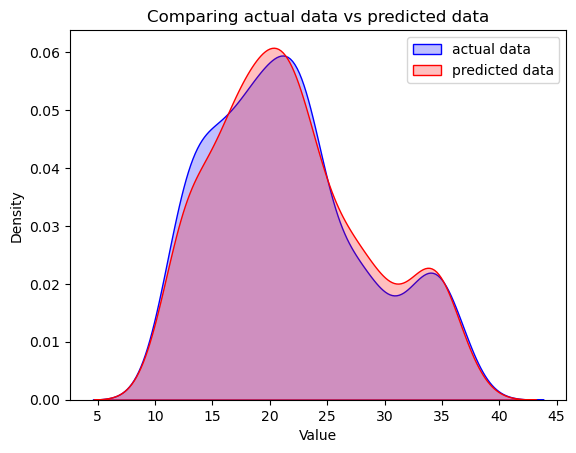

In [124]:
sns.kdeplot(dependent_test, color="blue", label="actual data", shade=True)
sns.kdeplot(predict_decisiontreeR, color="red", label="predicted data", shade=True)
plt.title('Comparing actual data vs predicted data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [125]:
score = cross_val_score(decisiontreeR,independent,dependent, scoring='r2')
print(score)
print(score.mean())
print("The overall difference is - ", (r2_score(dependent_test, predict_decisiontreeR) - score.mean())*100)

[0.70805995 0.58867064 0.61979164 0.69505827 0.56109775]
0.634535647973238
The overall difference is -  2.506038816114131


In [126]:
from sklearn.linear_model import SGDRegressor

In [127]:
SGDR = SGDRegressor()
SGDR.fit(independent_train, dependent_train)
predict_SGDR=SGDR.predict(independent_test)
pred_train=SGDR.predict(independent_train)
print('r2_score:', r2_score (dependent_test, predict_SGDR))
print('r2_score on given training data:',r2_score(dependent_train, pred_train)*100)
print('MAE:', mean_absolute_error(dependent_test, predict_SGDR))
print('MSE:', mean_squared_error(dependent_test, predict_SGDR))
print('RSE:', np.sqrt(mean_squared_error(dependent_test, predict_SGDR)))

r2_score: 0.8099405892474388
r2_score on given training data: 75.34946166255419
MAE: 1.9479592651397446
MSE: 8.793636032596275
RSE: 2.965406554352417


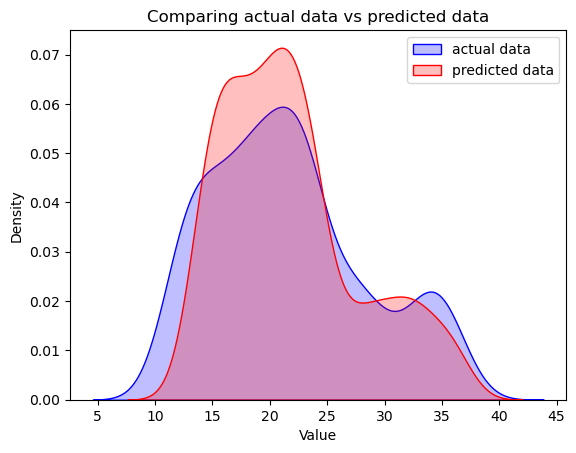

In [128]:
sns.kdeplot(dependent_test, color="blue", label="actual data", shade=True)
sns.kdeplot(predict_SGDR, color="red", label="predicted data", shade=True)
plt.title('Comparing actual data vs predicted data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [129]:
score = cross_val_score(SGDR,independent,dependent, scoring='r2')
print(score)
print(score.mean())
print("The overall difference is - ", (r2_score(dependent_test, predict_SGDR) - score.mean())*100)

[0.80691017 0.70691987 0.82853887 0.76945036 0.76245806]
0.7748554671780074
The overall difference is -  3.5085122069431485


In [130]:
from sklearn.linear_model import Lasso,Ridge

In [131]:
Lasso = Lasso()
Lasso.fit(independent_train, dependent_train)
predict_Lasso=Lasso.predict(independent_test)
pred_train=Lasso.predict(independent_train)
print('r2_score:', r2_score (dependent_test, predict_Lasso))
print('r2_score on given training data:',r2_score(dependent_train, pred_train)*100)
print('MAE:', mean_absolute_error(dependent_test, predict_Lasso))
print('MSE:', mean_squared_error(dependent_test, predict_Lasso))
print('RSE:', np.sqrt(mean_squared_error(dependent_test, predict_Lasso)))

r2_score: 0.5720478999214262
r2_score on given training data: 54.10706557708558
MAE: 3.3948729299343356
MSE: 19.800413947276652
RSE: 4.449765605880455


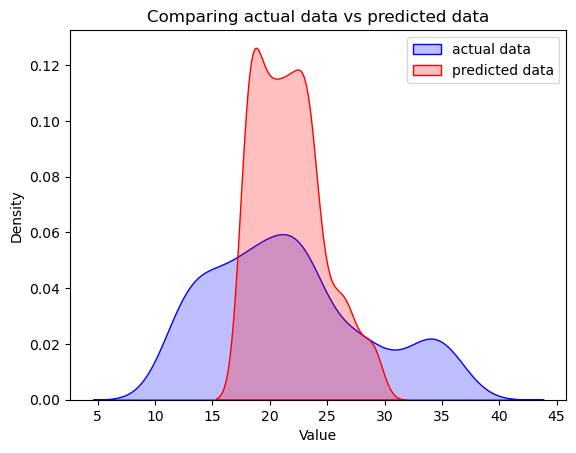

In [132]:
sns.kdeplot(dependent_test, color="blue", label="actual data", shade=True)
sns.kdeplot(predict_Lasso, color="red", label="predicted data", shade=True)
plt.title('Comparing actual data vs predicted data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [133]:
score = cross_val_score(Lasso,independent,dependent, scoring='r2')
print(score)
print(score.mean())
print("The overall difference is - ", (r2_score(dependent_test, predict_Lasso) - score.mean())*100)

[0.59141771 0.57298417 0.60237492 0.58056722 0.55677242]
0.5808232880461853
The overall difference is -  -0.8775388124759087


In [134]:
rg = Ridge()
rg.fit(independent_train, dependent_train)
predict_rg=rg.predict(independent_test)
pred_train=rg.predict(independent_train)
print('r2_score:', r2_score (dependent_test, predict_rg))
print('r2_score on given training data:',r2_score(dependent_train, pred_train)*100)
print('MAE:', mean_absolute_error(dependent_test, predict_rg))
print('MSE:', mean_squared_error(dependent_test, predict_rg))
print('RSE:', np.sqrt(mean_squared_error(dependent_test, predict_rg)))

r2_score: 0.8094923729836436
r2_score on given training data: 75.35376135320851
MAE: 1.9650108098016967
MSE: 8.814374025374946
RSE: 2.9689011477944067


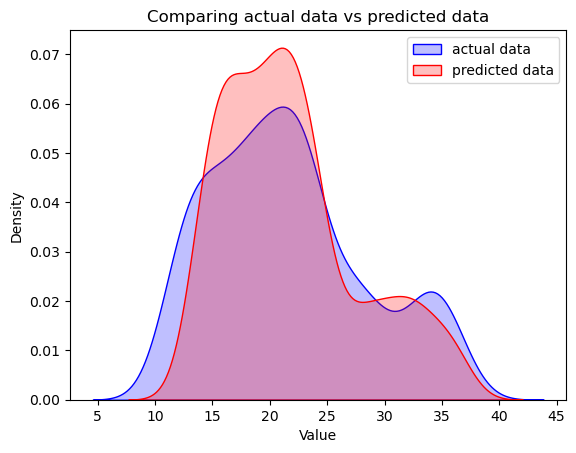

In [135]:
sns.kdeplot(dependent_test, color="blue", label="actual data", shade=True)
sns.kdeplot(predict_rg, color="red", label="predicted data", shade=True)
plt.title('Comparing actual data vs predicted data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [136]:
score = cross_val_score(rg,independent,dependent, scoring='r2')
print(score)
print(score.mean())
print("The overall difference is - ", (r2_score(dependent_test, predict_rg) - score.mean())*100)

[0.80657267 0.70733221 0.8311857  0.76941957 0.76240832]
0.7753836931466036
The overall difference is -  3.4108679837040023


In [137]:
GBregressor=GradientBoostingRegressor()
GBregressor.fit(independent_train, dependent_train)
predict_GBregressor=GBregressor.predict(independent_test)
pred_train=GBregressor.predict(independent_train)
print('r2_score:', r2_score (dependent_test, predict_GBregressor))
print('r2_score on given training data:',r2_score(dependent_train, pred_train)*100)
print('MAE:', mean_absolute_error(dependent_test, predict_GBregressor))
print('MSE:', mean_squared_error(dependent_test, predict_GBregressor))
print('RSE:', np.sqrt(mean_squared_error(dependent_test, predict_GBregressor)))

r2_score: 0.8569258576572036
r2_score on given training data: 87.35316567444296
MAE: 1.4726815335750547
MSE: 6.619729738488987
RSE: 2.572883545458089


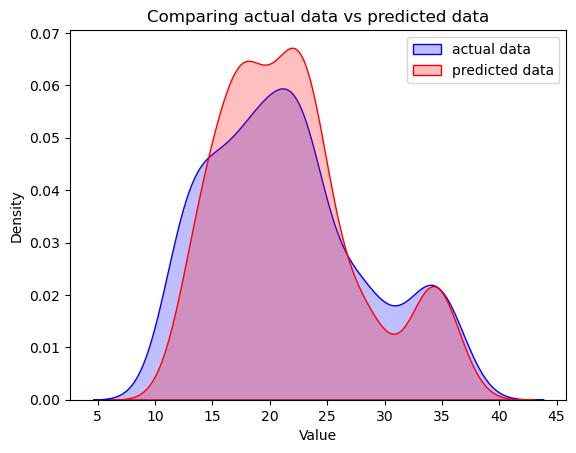

In [138]:
sns.kdeplot(dependent_test, color="blue", label="actual data", shade=True)
sns.kdeplot(predict_GBregressor, color="red", label="predicted data", shade=True)
plt.title('Comparing actual data vs predicted data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [139]:
score = cross_val_score(GBregressor,independent,dependent, scoring='r2')
print(score)
print(score.mean())
print("The overall difference is - ", (r2_score(dependent_test, predict_GBregressor) - score.mean())*100)

[0.87014836 0.74616958 0.89129543 0.83268931 0.82290639]
0.8326418138241486
The overall difference is -  2.4284043833055047


In [140]:
from sklearn.svm import SVR

In [141]:
supportVR=SVR(kernel='rbf')
supportVR.fit(independent_train, dependent_train)
predict_supportVR=supportVR.predict(independent_test)
pred_train=supportVR.predict(independent_train)
print('r2_score:', r2_score (dependent_test, predict_supportVR))
print('r2_score on given training data:',r2_score(dependent_train, pred_train)*100)
print('MAE:', mean_absolute_error(dependent_test, predict_supportVR))
print('MSE:', mean_squared_error(dependent_test, predict_supportVR))
print('RSE:', np.sqrt(mean_squared_error(dependent_test, predict_supportVR)))

r2_score: 0.7566425890837822
r2_score on given training data: 70.23073688465222
MAE: 1.631335435310798
MSE: 11.259618710584439
RSE: 3.355535532606448


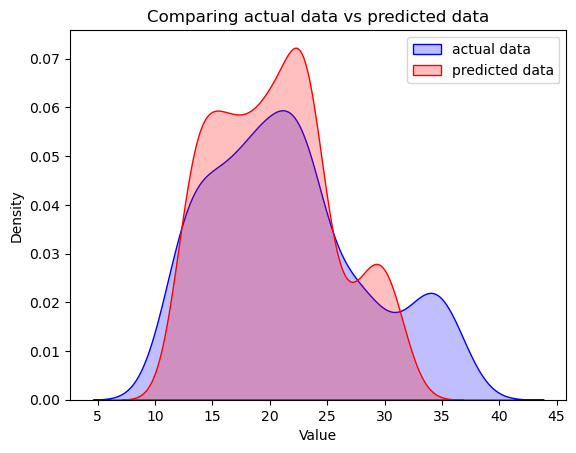

In [142]:
sns.kdeplot(dependent_test, color="blue", label="actual data", shade=True)
sns.kdeplot(predict_supportVR, color="red", label="predicted data", shade=True)
plt.title('Comparing actual data vs predicted data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [143]:
score = cross_val_score(supportVR,independent,dependent, scoring='r2')
print(score)
print(score.mean())
print("The overall difference is - ", (r2_score(dependent_test, predict_supportVR) - score.mean())*100)

[0.79858717 0.68017882 0.83855288 0.74771914 0.71717494]
0.7564425891118922
The overall difference is -  0.019999997189001917


In [144]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [145]:
RandomFR=RandomForestRegressor()
RandomFR.fit(independent_train, dependent_train)
predict_RandomFR=RandomFR.predict(independent_test)
pred_train=RandomFR.predict(independent_train)
print('r2_score:', r2_score (dependent_test, predict_RandomFR))
print('r2_score on given training data:',r2_score(dependent_train, pred_train)*100)
print('MAE:', mean_absolute_error(dependent_test, predict_RandomFR))
print('MSE:', mean_squared_error(dependent_test, predict_RandomFR))
print('RSE:', np.sqrt(mean_squared_error(dependent_test, predict_RandomFR)))

r2_score: 0.8344694621298574
r2_score on given training data: 96.60900739859318
MAE: 1.5621306981878826
MSE: 7.658738373155318
RSE: 2.767442569079857


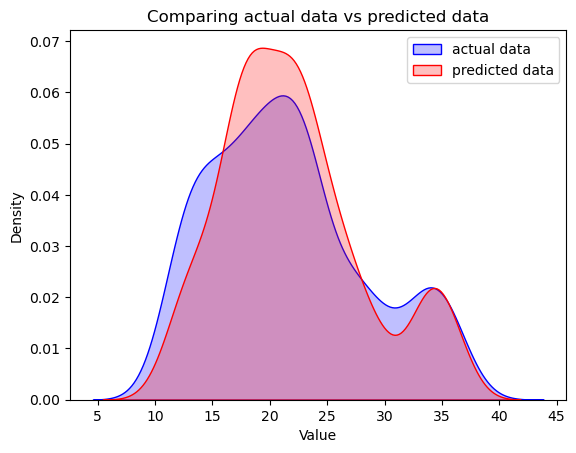

In [146]:
sns.kdeplot(dependent_test, color="blue", label="actual data", shade=True)
sns.kdeplot(predict_RandomFR, color="red", label="predicted data", shade=True)
plt.title('Comparing actual data vs predicted data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [147]:
score = cross_val_score(RandomFR,independent,dependent, scoring='r2')
print(score)
print(score.mean())
print("The overall difference is - ", (r2_score(dependent_test, predict_RandomFR) - score.mean())*100)

[0.83909562 0.7220104  0.84875674 0.8178144  0.81228911]
0.8079932545691019
The overall difference is -  2.6476207560755527


In [148]:
XtraTR=ExtraTreesRegressor()
XtraTR.fit(independent_train, dependent_train)
predict_XtraTR=XtraTR.predict(independent_test)
pred_train=XtraTR.predict(independent_train)
print('r2_score:', r2_score (dependent_test, predict_XtraTR))
print('r2_score on given training data:',r2_score(dependent_train, pred_train)*100)
print('MAE:', mean_absolute_error(dependent_test, predict_XtraTR))
print('MSE:', mean_squared_error(dependent_test, predict_XtraTR))
print('RSE:', np.sqrt(mean_squared_error(dependent_test, predict_XtraTR)))

r2_score: 0.7909273863170494
r2_score on given training data: 99.66567984940247
MAE: 1.5911689030238776
MSE: 9.673335626116588
RSE: 3.1101986473723167


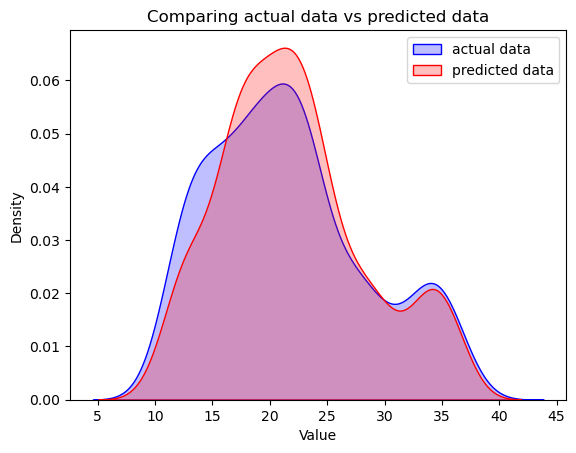

In [149]:
sns.kdeplot(dependent_test, color="blue", label="actual data", shade=True)
sns.kdeplot(predict_XtraTR, color="red", label="predicted data", shade=True)
plt.title('Comparing actual data vs predicted data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [150]:
score = cross_val_score(XtraTR,independent,dependent, scoring='r2')
print(score)
print(score.mean())
print("The overall difference is - ", (r2_score(dependent_test, predict_XtraTR) - score.mean())*100)

[0.81142638 0.68224225 0.83086979 0.78696323 0.79771462]
0.781843253161218
The overall difference is -  0.9084133155831342


In [151]:
from sklearn.model_selection import GridSearchCV

In [152]:
param_1 = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1,2,3],
    'min_samples_split': [5,6],
    'min_samples_leaf': [1,2],
    'max_features': ['sqrt', 'log2', None]
}

gcv=GridSearchCV(GradientBoostingRegressor(),param_1,cv=5)
gcv.fit(independent_train, dependent_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [1, 2, 3],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [5, 6],
                         'n_estimators': [100, 200, 300]})

In [153]:
best_params = gcv.best_params_
print("Perfect Parameters:", best_params)

Perfect Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [154]:
Finalmodel=GradientBoostingRegressor(learning_rate= 0.01, max_depth= 3, max_features = None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 400)

In [155]:
Finalmodel.fit(independent_train, dependent_train)
pred=Finalmodel.predict(independent_test)
print('r2_score:', r2_score (dependent_test, pred))
print('MAE:', mean_absolute_error(dependent_test, pred))
print('MSE:', mean_squared_error(dependent_test, pred))
print('RSE:', np.sqrt(mean_squared_error(dependent_test, pred)))

r2_score: 0.8644845968110103
MAE: 1.4727101346193223
MSE: 6.270003299157623
RSE: 2.5039974638880174


In [166]:
import joblib
filename = 'MedicalInsurance.pkl'
joblib.dump(GBregressor, filename)

['MedicalInsurance.pkl']

In [167]:
import pickle
filename='MedicalInsurance.pkl'
pickle.dump(GBregressor, open(filename, 'wb'))

In [172]:
import pickle
with open('MedicalInsurance.pkl', 'rb') as file:
    GBregressor = pickle.load(file)
output=GBregressor.score(independent_test,dependent_test)
print(output*100)

85.69258576572037


In [174]:
Results=pd.DataFrame([GBregressor.predict(independent_test)[:]],index=["predicted","actual"])
Results

,0,1,2,3,4,5,6,7,8,9,...,524,525,526,527,528,529,530,531,532,533
predicted,28.671306,18.557614,24.58561,24.849587,12.663716,19.132723,18.260473,14.665523,27.873625,13.021103,...,20.46435,18.828036,21.632823,13.485855,18.81071,28.729927,13.649287,22.460198,14.139264,27.044967
actual,28.671306,18.557614,24.58561,24.849587,12.663716,19.132723,18.260473,14.665523,27.873625,13.021103,...,20.46435,18.828036,21.632823,13.485855,18.81071,28.729927,13.649287,22.460198,14.139264,27.044967
